# Problem Set 3: Random Variables and Simulation Methods


## Exercise 1: Monte Carlo simulation: OLS asymptotic behavior.

Expected value B0_hat, B1_hat
[2.00038094 0.49410651]
1a =======


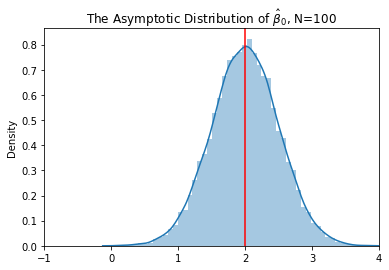

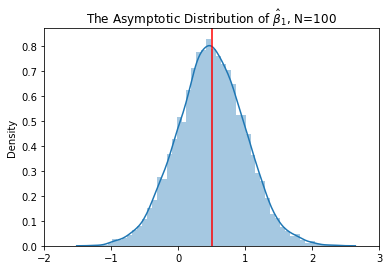

In [23]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(23)  # fix the seed at the beginning and only once.
import os
os.chdir('C:/Users/rodri/Dropbox/Programming for Economics/Lecture Notes/')

from functions_albert import  gini
import quantecon as qe 


import warnings
warnings.filterwarnings('ignore')  #sns warning disactivated

#%%  Exercise 1: Monte Carlo simulation 

## Showing that OLS is distributed asymptotically normal by Monte Carlo Simulations:

#   model (1)   --------------
#   y = 2 + 0.5*x2 + e     Thus, B*=0.5
#     e~N(0,25)

# Let's create a sample (a data), and estimate B* by OLS ----------
N= 100 # Sample size   # repeat exercise with N=10000
sigma_e = 5

#  fictisiously create our regressor x2.
x2 =  np.random.normal(0,1,N);  #x2 follows normal (0,1)

# e is an error term (what we don't observe in the data)
e = np.random.normal(0,sigma_e,N)

# And our dependent variable is:
y1 = 2 + 0.5*x2 +e

# Let's estimate the model by OLS
X = sm.add_constant(x2)  # We need to add constant, B0
ols1 = sm.OLS(y1,X).fit()   


# a.  Let's do a Monte Carlo simulation to study the asymptotic properties of B_ols.
N=100  #N=1000 in b)

# step1: Set the number of repetitions of the experiment; 
N_sim = 10000  # as if we could take the data 10000 times, have 10000 samples.

# step2: create an empty list to store the betas of the simulations.
betas_sim = []

# step 3:  Make N_sim simulations of the data and in each of them estimate the betas by OLS
for i in range(0,N_sim):
    x2 =  np.random.normal(0,1,N)
    e = np.random.normal(0,sigma_e,N)  
    y1 = 2 + 0.5*x2 +e
    
    X = sm.add_constant(x2)  # We need to add constant, B0
    ols1 = sm.OLS(y1,X).fit() 
    betas_sim.append(ols1.params) 


# THE MONTE CARLO EXPERIMENT IS DONE

# to make computations easier, pass the list to an array
betas_sim2 = np.array(betas_sim)    

# ASYMPPTOTIC PROPERTIES OF OLS:   
# 1. B_hat is a consistent estimator of B*:  E[B_hat] = B*
print('Expected value B0_hat, B1_hat')
a = np.mean(betas_sim, axis=0)
print(a)

# 2.00038094, 0.49410651

# 2. B_hat asymptotically follows a Normal Distribution: B_hat ~ N(B*, sigma_e*E[x2^2]^-1)
# B_0 asymptotic distribution

print('1a =======')

fig,ax  = plt.subplots()
ax = sns.distplot(betas_sim2[:,0],  kde=True)
plt.xlim((-1,4))
plt.axvline(x =2.0, color = 'r')
plt.title(r'The Asymptotic Distribution of $\hat{\beta}_0$, N='+str(N))
plt.show()

# B_1 asymptotic distribution
fig,ax  = plt.subplots()
ax = sns.distplot(betas_sim2[:,1],  kde=True)
plt.xlim((-2,3))
plt.axvline(x =0.5, color = 'r')
plt.title(r'The Asymptotic Distribution of $\hat{\beta}_1$, N='+str(N))
plt.show()

Expected value B0_hat, B1_hat
[1.99962124 0.50137398]
1b =======


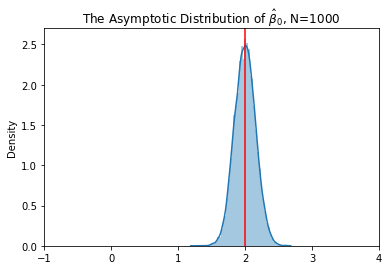

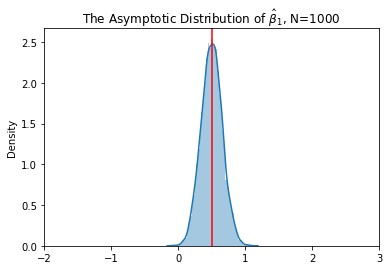

In [7]:
# b. Repeat Monte-Carlo Simulation with N=1000
N=1000  

# step1: Set the number of repetitions of the experiment; 
N_sim = 10000  # as if we could take the data 10000 times, have 10000 samples.

# step2: create an empty list to store the betas of the simulations.
betas_sim = []

# step 3:  Make N_sim simulations of the data and in each of them estimate the betas by OLS
for i in range(0,N_sim):
    x2 =  np.random.normal(0,1,N)
    e = np.random.normal(0,sigma_e,N)  
    y1 = 2 + 0.5*x2 +e
    
    X = sm.add_constant(x2)  # We need to add constant, B0
    ols1 = sm.OLS(y1,X).fit() 
    betas_sim.append(ols1.params) 


# THE MONTE CARLO EXPERIMENT IS DONE

# to make computations easier, pass the list to an array
betas_sim2 = np.array(betas_sim)    

# ASYMPPTOTIC PROPERTIES OF OLS:   
# 1. B_hat is a consistent estimator of B*:  E[B_hat] = B*
print('Expected value B0_hat, B1_hat')
a = np.mean(betas_sim, axis=0)
print(a)

# 2.00038094, 0.49410651

# 2. B_hat asymptotically follows a Normal Distribution: B_hat ~ N(B*, sigma_e*E[x2^2]^-1)
# B_0 asymptotic distribution

print('1b =======')

fig,ax  = plt.subplots()
ax = sns.distplot(betas_sim2[:,0],  kde=True)
plt.xlim((-1,4))
plt.axvline(x =2.0, color = 'r')
plt.title(r'The Asymptotic Distribution of $\hat{\beta}_0$, N='+str(N))
plt.show()

# B_1 asymptotic distribution
fig,ax  = plt.subplots()
ax = sns.distplot(betas_sim2[:,1],  kde=True)
plt.xlim((-2,3))
plt.axvline(x =0.5, color = 'r')
plt.title(r'The Asymptotic Distribution of $\hat{\beta}_1$, N='+str(N))
plt.show()

We observe that as our sample size increases the OLS estimator is more precise: it has a lower variance. Note that in the case of small samples, we can get OLS estimates that are far from the true value of the coefficients even when the model is true. While in the case of large samples, the OLS estimator is much more precise, the probability that we estimate an OLS coefficient from our sample that is far from the true coefficient's value is small.




## Exercise 2: Solving the earnings distribution in an Aiyagari economy

No handles with labels found to put in legend.


2a =======


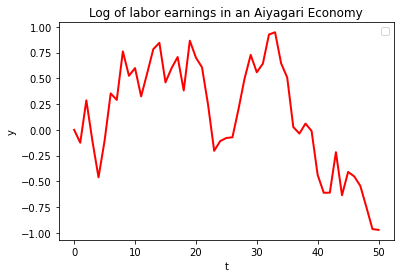

In [8]:


rho_a= 0.95
sigma_a=0.25

# a Simulate and plot the AR(1) process given by equation (1) for T=50 periods.

def ar_1_sim(T,rho,y0=0,a=0,sigma_e=1):
    ''' 
    ar_1_sim simulates for T periods an AR(1) process of the following form:
                y_t+1 = a + rho*y_t + e_t
                where e_t ~ N (0,sigma_e)
    '''
    y = np.empty(T+1)
    y[0] = y0
    for i in range(1,T+1):
        e = np.random.normal(0,sigma_e,1) 
        y[i] = a+ rho*y[i-1]+e
   
    return y

T=50

print('2a =======')

y1 = ar_1_sim(T,rho=rho_a, sigma_e=sigma_a)

fig, ax = plt.subplots()
ax.plot(range(0,T+1), y1, linewidth=2.0, color='r')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title(r'Log of labor earnings in an Aiyagari Economy')
ax.legend()
plt.show()


In [9]:
## b: Create a function that simulates N AR(1) processes for T periods
    
def ar_1_sim_N(N,T,rho,y0=0,a=0,sigma_e=1):
    y = np.empty((N,T+1))
    y[:,0] = y0
    
    for i in range(1,T+1):
        e = np.random.normal(0,sigma_e,N) 
        y[:,i] = a+ rho*y[:,i-1]+e
   
    return y

# Note: instead of using a loop for i..N, I just make the computations for an Nx1 array.
# This procedure which is usually referred as vectorization highly speeds the computational time.
# Since in numpy functions are vectorized (they work element-wise), it is relatively easy 
# to set our computations in terms of vectors.

# For more on vectorization: 
# check the quantecon side on Numpy point 9.7 Additional functionality:
# https://python-programming.quantecon.org/numpy.html

2c =======


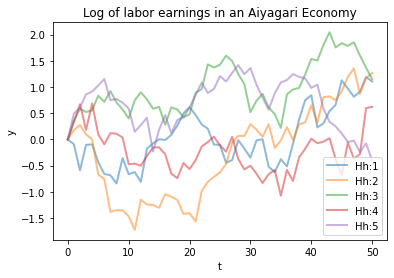

In [11]:
## c Simulate and plot 5 AR(1) processes given by equation (1) for t=50 periods.
five_ar1s = ar_1_sim_N(N=5,T=T,rho=rho_a,sigma_e=sigma_a)
print('2c =======')
fig, ax = plt.subplots()
for i in range(0,len(five_ar1s)):
    ax.plot(range(0,T+1), five_ar1s[i,:], linewidth=2.0, alpha=0.5, label='Hh:'+str(i+1))
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title(r'Log of labor earnings in an Aiyagari Economy')
ax.legend()
plt.show() 


TOC: Elapsed: 0:00:0.42
2d =======


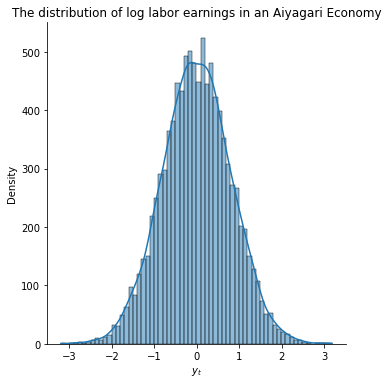

The log-variance of earnings is
0.6525183723066961
The Gini of earnings is
0.432851449352985


In [20]:
## d. Finding the stationary earnings distribution.
N = 10000
T=1000

# in this case given y0, it was not necessary to use a large T. But let's do it anyway
qe.tic()
sim_out = ar_1_sim_N(N,T,rho=rho_a,sigma_e=sigma_a)
qe.toc()
stat_distr_yt = sim_out[:,T]

print('2d =======')
sns.displot(stat_distr_yt, kde=True)
plt.title(r'The distribution of log labor earnings in an Aiyagari Economy')
plt.xlabel(r'$y_t$')
plt.ylabel('Density')
plt.show()    


print('The log-variance of earnings is')
print(np.var(stat_distr_yt))

print('The Gini of earnings is')
print(gini(np.exp(stat_distr_yt)))

In [14]:
#e. Discretizing the earning process into a Markov Chain

mc_ar1 = qe.rouwenhorst(n=3, ybar=0, sigma=sigma_a, rho=rho_a)
P1 = mc_ar1.P
np.set_printoptions(suppress=True)
print('2e =======')
print('The transition matrix P is')
print(P1)
psi_star = mc_ar1.stationary_distributions
print('The stationary probabilistic vector is')
print(psi_star)

2e =======
The transition matrix P is
[[0.950625 0.04875  0.000625]
 [0.024375 0.95125  0.024375]
 [0.000625 0.04875  0.950625]]
The stationary probabilistic vector is
[[0.25 0.5  0.25]]


## Exercise 3: simulating distributions and computing expectations

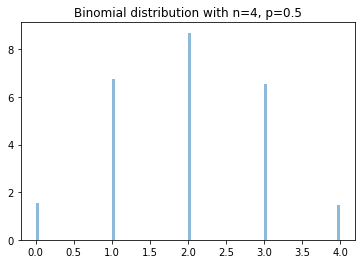

Mean binomial: 1.984


In [17]:
# a. Binomial distribution: n bernoulli experiments. 
bin_x = np.random.binomial(n=4,p=0.5,size=1000)
print('3a =======')
fig, ax = plt.subplots() 
ax.hist(bin_x, bins=100, density=True,alpha=0.5)
plt.title('Binomial distribution with n=4, p=0.5')
plt.show()

print('Mean binomial:', np.mean(bin_x))

# For this exercise we can think of the distribution as the outcome of a game where we throw a coin 4 times and 
# for each time head appears we win 1$. # On average we should win 2$.

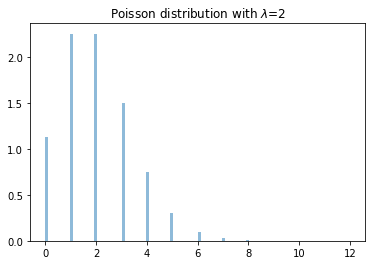

3b =======
Monte Carlo Integration of g(x), x~Poisson
E[g(x)] = 6.0
Note that g(E(x)) is not equal to E[g(x)] since g() is not linear.
g(E[x])= 4
only if g(x)=ax+b, then we know that E(ax+b) = aE(x)+b


In [24]:

# b. E(g(x)) where g=x^2, x~Poisson(Lambda)
def g(x):
    return (x)**(2)

# Simulate xfor a big sample N
N = 1000000
lamb = 2
pois_x = np.random.poisson(lamb,size=N)

# For curiosity, let's look at the shape of the distribution
fig, ax = plt.subplots() 
ax.hist(pois_x, bins=100, density=True,alpha=0.5)
plt.title(r'Poisson distribution with $\lambda$=2')
plt.show()

# Monte Carlo integration: sample average of g(x)
mc_integr_1 = np.mean(g(pois_x))

# result
print('3b =======')
print('Monte Carlo Integration of g(x), x~Poisson')
print('E[g(x)] =', round(mc_integr_1,2))

print('Note that g(E(x)) is not equal to E[g(x)] since g() is not linear.')
print('g(E[x])=', g(lamb))
print('only if g(x)=ax+b, then we know that E(ax+b) = aE(x)+b')

## Exercise 4: solving an economy

4a =======
statistics of y~logN()
Mean(y)= 2479.763993812564
Var(y)= 5819079.493442647
Gini(y)= 0.429622064090943
4b =======
statistics of c=g(y)
Mean(y)= 2233.059255534753
Var(y)= 2434038.0234465576
Gini(y)= 0.31570830066246713
4c =======


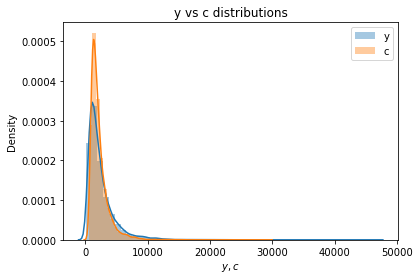

In [22]:
#Exercise 4: solving an economy

N = 100000
lny = np.random.normal(7.5,0.8,10000)
y = np.exp(lny)

print('4a =======')
print('statistics of y~logN()')
print('Mean(y)=', np.mean(y))
print('Var(y)=', np.var(y))
print('Gini(y)=', gini(y))


# b

def c_rule(y):
    c = (y)**(1/1.25)+0.5*y+500
    return c

# By Montecarlo integration we use the sample average. However, if we want to use
# other statistics, we can since basically we simulated the distribution of c.

c = c_rule(y)

print('4b =======')
print('statistics of c=g(y)')
print('Mean(y)=', np.mean(c))
print('Var(y)=', np.var(c))
print('Gini(y)=', gini(c))


# c. Plot in a same graph the distribution of consumption and income
print('4c =======')
fig, ax = plt.subplots()
sns.distplot(y, label='y')
sns.distplot(c, label='c')
plt.title('y vs c distributions')
plt.xlabel(r'$y, c$')
plt.ylabel('Density')
ax.legend()
plt.show()  

